## 2.1 Logistic Regression ##

In [4]:
import pandas as pd
import numpy as np
# from numpy import loadtxt, where
# from pylab import scatter, show, legend, xlabel, ylabel
import matplotlib.pyplot as plt

In [35]:
# data0 = loadtxt('ex2data1.txt', delimiter=',')
# # X = data0[:, 0:2]
# # y = data0[:, 2]
# # pos = where(y == 1)
# # neg = where(y == 0)
# # scatter(X[pos, 0], X[pos, 1], marker='o', c='b')
# # scatter(X[neg, 0], X[neg, 1], marker='x', c='r')
# data0

array([[34.62365962, 78.02469282,  0.        ],
       [30.28671077, 43.89499752,  0.        ],
       [35.84740877, 72.90219803,  0.        ],
       [60.18259939, 86.3085521 ,  1.        ],
       [79.03273605, 75.34437644,  1.        ],
       [45.08327748, 56.31637178,  0.        ],
       [61.10666454, 96.51142588,  1.        ],
       [75.02474557, 46.55401354,  1.        ],
       [76.0987867 , 87.42056972,  1.        ],
       [84.43281996, 43.53339331,  1.        ],
       [95.86155507, 38.22527806,  0.        ],
       [75.01365839, 30.60326323,  0.        ],
       [82.30705337, 76.4819633 ,  1.        ],
       [69.36458876, 97.71869196,  1.        ],
       [39.53833914, 76.03681085,  0.        ],
       [53.97105215, 89.20735014,  1.        ],
       [69.07014406, 52.74046973,  1.        ],
       [67.94685548, 46.67857411,  0.        ],
       [70.66150955, 92.92713789,  1.        ],
       [76.97878373, 47.57596365,  1.        ],
       [67.37202755, 42.83843832,  0.   

In [5]:
path = 'ex2data1.txt'
data = pd.read_csv(path,header=None,names=['Exam 1','Exam 2','Admitted'])
data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [7]:
data.describe()

,Exam 1,Exam 2,Admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


#### 2.1.1 Visualizing the data ####

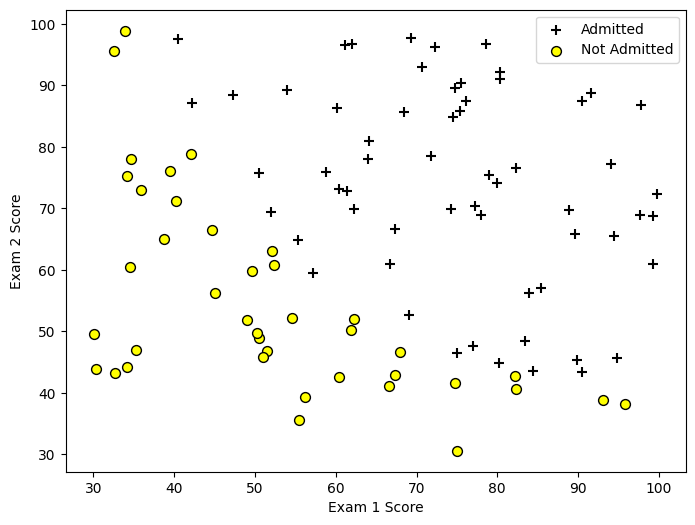

In [32]:
# data.plot(kind='box')
Admitted = data[data['Admitted'] == 1]
NotAdmitted = data[data['Admitted'] == 0]

#data.plot(kind='scatter',x='Exam 1',y='Exam 2')
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(Admitted['Exam 1'],Admitted['Exam 2'],s=50,c='black',marker='+',label='Admitted')
ax.scatter(NotAdmitted['Exam 1'],NotAdmitted['Exam 2'],s=50,c='yellow',marker='o',edgecolors='black',label='Not Admitted')
ax.legend(loc='upper right')
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')
plt.show()

#### Implementation ####

In [6]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

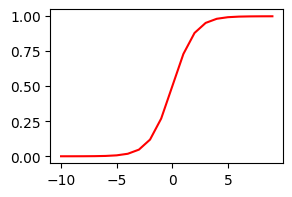

In [43]:
# nums = np.arange(-10, 10, step=1)
# 
# fig, ax = plt.subplots(figsize=(3,2))
# ax.plot(nums, sigmoid(nums), 'r')
# plt.show()

In [24]:
def cost(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    m = y.shape[0]
    h = sigmoid(X.dot(theta.T))
    return np.sum(-np.multiply(y, np.log(h))-np.multiply((1-y),np.log(1-h)))/m  

In [28]:
def gradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)    
    error = sigmoid(X * theta.T) - y    
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)    
    return grad

In [35]:
def predict(theta, X):
    probability = sigmoid(X * theta.T)
    # return [1 if x >= 0.5 else 0 for x in probability]
    return probability

In [10]:
data.insert(0, 'Ones', 1)

cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

X = np.array(X.values)
y = np.array(y.values)
theta = np.zeros(3)

ValueError: cannot insert Ones, already exists

In [22]:
theta,X.shape,theta.shape,y.shape

(array([0., 0., 0.]), (100, 3), (3,), (100, 1))

初始

In [27]:
cost(theta,X,y), gradient(theta, X, y)

(0.6931471805599453, array([ -0.1       , -12.00921659, -11.26284221]))

法1. 用SciPy的truncated newton（TNC）寻找最优参数

In [30]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, y))
result

(array([-25.16131865,   0.20623159,   0.20147149]), 36, 0)

In [31]:
cost(result[0], X, y)

0.20349770158947447

In [32]:
theta_min = np.matrix(result[0])
# predictions = predict(theta_min, X)
# correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
# accuracy = (sum(map(int, correct)) % len(correct))
# print ('accuracy = {0}%'.format(accuracy))

accuracy = 89%


In [40]:
result[0], theta_min

(array([-25.16131865,   0.20623159,   0.20147149]),
 matrix([[-25.16131865,   0.20623159,   0.20147149]]))

In [44]:
predict(theta_min, [1,45,85])[0,0]

0.7762906240358698

求h=0.5的点 -> z=0 -> z=$\theta_0+\theta_1×x_1+\theta_2×x_2$=0 -> decision_boundary

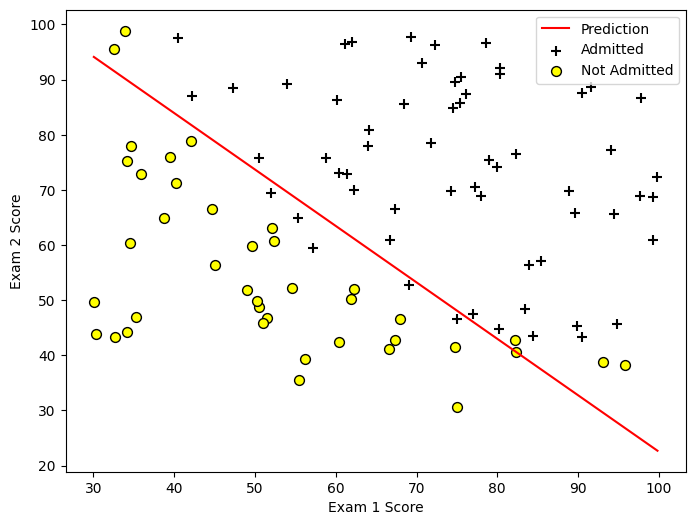

In [57]:
Admitted = data[data['Admitted'] == 1]
NotAdmitted = data[data['Admitted'] == 0]
x = np.linspace(data['Exam 1'].min(),data['Exam 1'].max(),100)
# 计算决策边界
decision_boundary = - (theta_min[0,1] * x + theta_min[0,0]) / theta_min[0,2]

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, decision_boundary, 'r', label='Prediction')
ax.scatter(Admitted['Exam 1'],Admitted['Exam 2'],s=50,c='black',marker='+',label='Admitted')
ax.scatter(NotAdmitted['Exam 1'],NotAdmitted['Exam 2'],s=50,c='yellow',marker='o',edgecolors='black',label='Not Admitted')
ax.legend(loc='upper right')
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')
plt.show()